In [461]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [462]:
dados = pd.read_csv('soci_econ_country_profiles.csv')
dados.head()

,Unnamed: 0,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),Economy: Industry (% of GVA),Economy: Services and other activity (% of GVA),Employment: Agriculture (% of employed),Employment: Industry (% of employed),Employment: Services (% of employed),Unemployment (% of labour force),Labour force participation (female/male pop. %),Agricultural production index (2004-2006=100),Food production index (2004-2006=100),International trade: Exports (million US$),International trade: Imports (million US$),International trade: Balance (million US$),"Balance of payments, current account (million US$)",Population growth rate (average annual %),Urban population (% of total population)_x,Urban population growth rate (average annual %),"Fertility rate, total (live births per woman)","Population age distribution (0-14 / 60+ years, %)",International migrant stock (000/% of total pop.),Refugees and others of concern to UNHCR (in thousands),Infant mortality rate (per 1000 live births,Health: Total expenditure (% of GDP),Health: Physicians (per 1000 pop.),Education: Government expenditure (% of GDP),Education: Primary gross enrol. ratio (f/m per 100 pop.),Education: Secondary gross enrol. ratio (f/m per 100 pop.),Education: Tertiary gross enrol. ratio (f/m per 100 pop.),Seats held by women in national parliaments %,Mobile-cellular subscriptions (per 100 inhabitants),...,Traffic commute time index,Pollution index,Climate index,Gross Rental Yield City Center,Gross Rental Yield Outside Center,Property Price to Rent Ratio City Center,Property Price to Rent Ratio Outside Center,Mortgate as percentage of income,Affordability Index,Cost Of Living Index,Rent Index,Cost Of Living Plus Rent Index,Grocery Index,Restaurant Price Index,Local Purchasing Power Index,Access to electricity (% of population),Adjusted net national income per capita (constant 2010 US$),Age dependency ratio (% of working-age population),"Air transport, freight (million ton-km)","Air transport, passengers carried",Commercial service exports (current US$),Commercial service imports (current US$),Consumer price index (2010 = 100),Current account balance (% of GDP),Current health expenditure (% of GDP),Exports of goods and services (% of GDP),Gross domestic savings (% of GDP),High-technology exports (current US$),Human capital index (HCI) (scale 0-1),Imports of goods and services (% of GDP),"Inflation, consumer prices (annual %)","Life expectancy at birth, female (years)","Life expectancy at birth, male (years)","Life expectancy at birth, total (years)",Military expenditure (% of GDP),"Population, female","Population, male",Tax revenue (% of GDP),"Taxes on income, profits and capital gains (% of revenue)",Urban population (% of total population)_y
0,0,Argentina,SouthAmerica,2780400,44271,16.2,95.9,632343,2.4,14564.5,6.0,27.8,66.2,2.0,24.8,73.1,6.5,48.6/74.4,119,119,57733,55610,2124,-15944,1.0,91.8,1.0,2.3,24.9/15.4,2086.3/4.8,5.0,13.7,4.8,3.8,5.3,109.8/110.2,110.3/103.4,102.9/63.5,38.9,143.9,...,37.95,53.33,90.67,3.77,3.90,26.53,25.64,333.23,0.30,52.57,13.92,34.05,44.06,50.37,58.40,100.0,9094.367252,56.046355,305.102000,16749271.0,1.527416e+10,2.498242e+10,112.887108,-4.848850,9.124315,11.242721,16.019342,1.494148e+09,0.611,13.980611,NaN,79.726,72.924,76.372000,0.856138,22572521.0,21472290.0,10.955501,12.929913,91.749
1,1,Australia,Oceania,7692060,24451,3.2,99.3,1230859,2.4,51352.2,2.5,26.5,71.1,2.7,21.2,76.1,5.5,58.4/70.7,111,111,189630,189406,224,-57746,1.5,89.4,1.5,1.9,19.0/21.0,6763.7/28.2,58.2,3.9,9.4,3.4,5.2,102.1/102.3,133.6/141.3,106.3/75.4,28.7,132.8,...,34.73,24.58,72.79,4.90,5.05,20.41,19.82,70.87,1.41,80.66,42.54,62.39,76.87,77.12,101.94,100.0,43073.967170,52.599671,1982.586171,74257326.0,6.429639e+10,6.739220e+10,115.686785,-2.689997

In [463]:
dados.isnull().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 8, 5, 3, 3, 2, 3, 1, 1, 1, 1, 2, 1, 2, 0,
       0, 0, 3, 0, 0, 8, 9, 0])

In [464]:
categoricos = []
for x in dados:
  if dados[x].dtypes == 'object':
    categoricos.append(x)

In [465]:
categoricos = dados[categoricos].copy()
categoricos.head()

,country,Region,Economy: Agriculture (% of GVA),Labour force participation (female/male pop. %),Population growth rate (average annual %),Urban population growth rate (average annual %),"Population age distribution (0-14 / 60+ years, %)",International migrant stock (000/% of total pop.),Refugees and others of concern to UNHCR (in thousands),Health: Physicians (per 1000 pop.),Education: Government expenditure (% of GDP),Education: Primary gross enrol. ratio (f/m per 100 pop.),Education: Secondary gross enrol. ratio (f/m per 100 pop.),Education: Tertiary gross enrol. ratio (f/m per 100 pop.),Forested area (% of land area),Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)"
0,Argentina,SouthAmerica,6.0,48.6/74.4,1.0,1.0,24.9/15.4,2086.3/4.8,5.0,3.8,5.3,109.8/110.2,110.3/103.4,102.9/63.5,204.0/4.7,99.0/100.0,96.2/98.3,0.01
1,Australia,Oceania,2.5,58.4/70.7,1.5,1.5,19.0/21.0,6763.7/28.2,58.2,3.4,5.2,102.1/102.3,133.6/141.3,106.3/75.4,361.3/15.3,100.0/100.0,100.0/100.0,-99
2,Austria,WesternEurope,1.3,54.6/65.8,0.6,0.4,14.1/25.1,1492.4/17.5,166.4,5.2,5.5,102.2/103.7,97.6/102.4,89.2/74.3,58.7/6.9,100.0/100.0,100.0/100.0,-99
3,Belarus,EasternEurope,7.5,54.0/67.8,~0.0,~0.0,16.7/21.3,1082.9/11.4,7.9,4.1,4.9,101.3/101.4,106.4/107.8,100.7/75.9,63.5/6.7,99.9/99.1,94.1/95.2,0.20
4,Belgium,WesternEurope,0.7,48.1/58.9,0.6,0.5,17.1/24.6,1387.9/12.3,63.8,3.0,6.6,104.2/104.2,177.7/156.4,85.4/65.0,93.4/8.3,100.0/100.0,99.5/99.4,-99


In [466]:
categoricos['Pop. using improved drinking water (urban/rural, %)'] = categoricos['Pop. using improved drinking water (urban/rural, %)'].str.split('/')
teste = categoricos['Pop. using improved drinking water (urban/rural, %)'].str.slice(1).sum()

In [467]:
categoricos['Labour force participation (female/male pop. %)'] = categoricos['Labour force participation (female/male pop. %)'].str.split('/')
categoricos['Labour force participation male %'] = categoricos['Labour force participation (female/male pop. %)'].str.slice(1).sum()
categoricos['Labour force participation female %'] = categoricos['Labour force participation (female/male pop. %)'].str.slice(0,1).sum()
categoricos.drop('Labour force participation (female/male pop. %)', axis=1, inplace=True)

In [468]:
categoricos['Population age distribution (0-14 / 60+ years, %)'] = categoricos['Population age distribution (0-14 / 60+ years, %)'].str.split('/')
categoricos['Population age distribution 0-14 y.o %'] = categoricos['Population age distribution (0-14 / 60+ years, %)'].str.slice(0,1).sum()
categoricos['Population age distribution 60+ y.o %)'] = categoricos['Population age distribution (0-14 / 60+ years, %)'].str.slice(1).sum()
categoricos.drop('Population age distribution (0-14 / 60+ years, %)', axis=1, inplace=True)

In [469]:
categoricos['International migrant stock (000/% of total pop.)'] = categoricos['International migrant stock (000/% of total pop.)'].str.split('/')
categoricos['International migrant stock (% of total pop.)'] = categoricos['International migrant stock (000/% of total pop.)'].str.slice(1).sum()
categoricos.drop("International migrant stock (000/% of total pop.)", axis=1, inplace=True)

In [470]:
categoricos['Education: Primary gross enrol. ratio (f/m per 100 pop.)'] = categoricos['Education: Primary gross enrol. ratio (f/m per 100 pop.)'].str.split('/')
categoricos['Education: Primary gross enrol. ratio (per 100 pop.)'] = categoricos['Education: Primary gross enrol. ratio (f/m per 100 pop.)'].str.slice(0,1).sum()
categoricos.drop('Education: Primary gross enrol. ratio (f/m per 100 pop.)', axis=1, inplace=True)

In [471]:
categoricos['Education: Secondary gross enrol. ratio (f/m per 100 pop.)'] = categoricos['Education: Secondary gross enrol. ratio (f/m per 100 pop.)'].str.split('/')
categoricos['Education: Secondary gross enrol. ratio (per 100 pop.)'] = categoricos['Education: Secondary gross enrol. ratio (f/m per 100 pop.)'].str.slice(0,1).sum()
categoricos.drop('Education: Secondary gross enrol. ratio (f/m per 100 pop.)', axis=1, inplace=True)

In [472]:
categoricos['Education: Tertiary gross enrol. ratio (f/m per 100 pop.)'] = categoricos['Education: Tertiary gross enrol. ratio (f/m per 100 pop.)'].str.split('/')
categoricos['Education: Tertiary gross enrol. ratio (per 100 pop.)'] = categoricos['Education: Tertiary gross enrol. ratio (f/m per 100 pop.)'].str.slice(0,1).sum()
categoricos.drop('Education: Tertiary gross enrol. ratio (f/m per 100 pop.)', axis=1, inplace=True)

In [473]:
categoricos['Forested area (% of land area)'] = categoricos['Forested area (% of land area)'].str.split('/')
categoricos['Forested area (% of land area)'] = categoricos['Forested area (% of land area)'].str.slice(1).sum()

In [474]:
categoricos['Energy supply per capita (Gigajoules)'] = categoricos['Energy supply per capita (Gigajoules)'].str.split('/')
categoricos['Energy supply per capita (Gigajoules)'] = categoricos['Energy supply per capita (Gigajoules)'].str.slice(0,1).sum()

In [475]:
categoricos.drop('Pop. using improved drinking water (urban/rural, %)', axis=1, inplace=True)

In [476]:
categoricos.head()

,country,Region,Economy: Agriculture (% of GVA),Population growth rate (average annual %),Urban population growth rate (average annual %),Refugees and others of concern to UNHCR (in thousands),Health: Physicians (per 1000 pop.),Education: Government expenditure (% of GDP),Forested area (% of land area),Energy supply per capita (Gigajoules),"Pop. using improved sanitation facilities (urban/rural, %)",Labour force participation male %,Labour force participation female %,Population age distribution 0-14 y.o %,Population age distribution 60+ y.o %),International migrant stock (% of total pop.),Education: Primary gross enrol. ratio (per 100 pop.),Education: Secondary gross enrol. ratio (per 100 pop.),Education: Tertiary gross enrol. ratio (per 100 pop.)
0,Argentina,SouthAmerica,6.0,1.0,1.0,5.0,3.8,5.3,4.7,99.0,0.01,74.4,48.6,24.9,15.4,4.8,109.8,110.3,102.9
1,Australia,Oceania,2.5,1.5,1.5,58.2,3.4,5.2,15.3,100.0,-99,70.7,58.4,19.0,21.0,28.2,102.1,133.6,106.3
2,Austria,WesternEurope,1.3,0.6,0.4,166.4,5.2,5.5,6.9,100.0,-99,65.8,54.6,14.1,25.1,17.5,102.2,97.6,89.2
3,Belarus,EasternEurope,7.5,~0.0,~0.0,7.9,4.1,4.9,6.7,99.9,0.20,67.8,54.0,16.7,21.3,11.4,101.3,106.4,100.7
4,Belgium,WesternEurope,0.7,0.6,0.5,63.8,3.0,6.6,8.3,100.0,-99,58.9,48.1,17.1,24.6,12.3,104.2,177.7,85.4


In [477]:
categoricos = categoricos.apply(lambda x: x.replace("~0.0", "0"))
categoricos = categoricos.apply(lambda x: x.replace("-~0.0", "0"))
categoricos = categoricos.apply(lambda x: x.replace("...", ""))
categoricos = categoricos.apply(lambda x: x.replace("", 0))

In [478]:
categoricos.head()

,country,Region,Economy: Agriculture (% of GVA),Population growth rate (average annual %),Urban population growth rate (average annual %),Refugees and others of concern to UNHCR (in thousands),Health: Physicians (per 1000 pop.),Education: Government expenditure (% of GDP),Forested area (% of land area),Energy supply per capita (Gigajoules),"Pop. using improved sanitation facilities (urban/rural, %)",Labour force participation male %,Labour force participation female %,Population age distribution 0-14 y.o %,Population age distribution 60+ y.o %),International migrant stock (% of total pop.),Education: Primary gross enrol. ratio (per 100 pop.),Education: Secondary gross enrol. ratio (per 100 pop.),Education: Tertiary gross enrol. ratio (per 100 pop.)
0,Argentina,SouthAmerica,6.0,1.0,1.0,5.0,3.8,5.3,4.7,99.0,0.01,74.4,48.6,24.9,15.4,4.8,109.8,110.3,102.9
1,Australia,Oceania,2.5,1.5,1.5,58.2,3.4,5.2,15.3,100.0,-99,70.7,58.4,19.0,21.0,28.2,102.1,133.6,106.3
2,Austria,WesternEurope,1.3,0.6,0.4,166.4,5.2,5.5,6.9,100.0,-99,65.8,54.6,14.1,25.1,17.5,102.2,97.6,89.2
3,Belarus,EasternEurope,7.5,0,0,7.9,4.1,4.9,6.7,99.9,0.20,67.8,54.0,16.7,21.3,11.4,101.3,106.4,100.7
4,Belgium,WesternEurope,0.7,0.6,0.5,63.8,3.0,6.6,8.3,100.0,-99,58.9,48.1,17.1,24.6,12.3,104.2,177.7,85.4


In [479]:
categoricos.iloc[:,2:] = categoricos.iloc[:,2:].astype('float')

In [480]:
for x in categoricos.iloc[:,2:].columns:
  categoricos[x] = categoricos[x].replace(0, categoricos[x].mean())
  categoricos[x] = categoricos[x].replace(-99, 0.01)

In [481]:
categoricos.head()

,country,Region,Economy: Agriculture (% of GVA),Population growth rate (average annual %),Urban population growth rate (average annual %),Refugees and others of concern to UNHCR (in thousands),Health: Physicians (per 1000 pop.),Education: Government expenditure (% of GDP),Forested area (% of land area),Energy supply per capita (Gigajoules),"Pop. using improved sanitation facilities (urban/rural, %)",Labour force participation male %,Labour force participation female %,Population age distribution 0-14 y.o %,Population age distribution 60+ y.o %),International migrant stock (% of total pop.),Education: Primary gross enrol. ratio (per 100 pop.),Education: Secondary gross enrol. ratio (per 100 pop.),Education: Tertiary gross enrol. ratio (per 100 pop.)
0,Argentina,SouthAmerica,6.0,1.000000,1.000000,5.0,3.8,5.3,4.7,99.0,0.01,74.4,48.6,24.9,15.4,4.8,109.8,110.3,102.9
1,Australia,Oceania,2.5,1.500000,1.500000,58.2,3.4,5.2,15.3,100.0,0.01,70.7,58.4,19.0,21.0,28.2,102.1,133.6,106.3
2,Austria,WesternEurope,1.3,0.600000,0.400000,166.4,5.2,5.5,6.9,100.0,0.01,65.8,54.6,14.1,25.1,17.5,102.2,97.6,89.2
3,Belarus,EasternEurope,7.5,0.854545,1.172727,7.9,4.1,4.9,6.7,99.9,0.20,67.8,54.0,16.7,21.3,11.4,101.3,106.4,100.7
4,Belgium,WesternEurope,0.7,0.600000,0.500000,63.8,3.0,6.6,8.3,100.0,0.01,58.9,48.1,17.1,24.6,12.3,104.2,177.7,85.4


In [482]:
categoricos.drop('Pop. using improved sanitation facilities (urban/rural, %)', axis=1,inplace=True)

### Cleaning numeric variables

In [483]:
numericos = []
for x in dados:
  if dados[x].dtypes != 'object':
    numericos.append(x)

In [484]:
numericos = dados[numericos].copy()
numericos.head()

,Unnamed: 0,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Industry (% of GVA),Economy: Services and other activity (% of GVA),Employment: Agriculture (% of employed),Employment: Industry (% of employed),Employment: Services (% of employed),Unemployment (% of labour force),Agricultural production index (2004-2006=100),Food production index (2004-2006=100),International trade: Exports (million US$),International trade: Imports (million US$),International trade: Balance (million US$),"Balance of payments, current account (million US$)",Urban population (% of total population)_x,"Fertility rate, total (live births per woman)",Infant mortality rate (per 1000 live births,Health: Total expenditure (% of GDP),Seats held by women in national parliaments %,Mobile-cellular subscriptions (per 100 inhabitants),Mobile-cellular subscriptions (per 100 inhabitants).1,Individuals using the Internet (per 100 inhabitants),Threatened species (number),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Net Official Development Assist. received (% of GNI),Quality Of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living,Property price to income ratio,Traffic commute time index,Pollution index,Climate index,Gross Rental Yield City Center,Gross Rental Yield Outside Center,Property Price to Rent Ratio City Center,Property Price to Rent Ratio Outside Center,Mortgate as percentage of income,Affordability Index,Cost Of Living Index,Rent Index,Cost Of Living Plus Rent Index,Grocery Index,Restaurant Price Index,Local Purchasing Power Index,Access to electricity (% of population),Adjusted net national income per capita (constant 2010 US$),Age dependency ratio (% of working-age population),"Air transport, freight (million ton-km)","Air transport, passengers carried",Commercial service exports (current US$),Commercial service imports (current US$),Consumer price index (2010 = 100),Current account balance (% of GDP),Current health expenditure (% of GDP),Exports of goods and services (% of GDP),Gross domestic savings (% of GDP),High-technology exports (current US$),Human capital index (HCI) (scale 0-1),Imports of goods and services (% of GDP),"Inflation, consumer prices (annual %)","Life expectancy at birth, female (years)","Life expectancy at birth, male (years)","Life expectancy at birth, total (years)",Military expenditure (% of GDP),"Population, female","Population, male",Tax revenue (% of GDP),"Taxes on income, profits and capital gains (% of revenue)",Urban population (% of total population)_y
0,0,2780400,44271,16.2,95.9,632343,2.4,14564.5,27.8,66.2,2.0,24.8,73.1,6.5,119,119,57733,55610,2124,-15944,91.8,2.3,13.7,4.8,38.9,143.9,69.4,256,10.0,3167,85,-99,139.59,58.40,37.37,73.30,52.57,12.07,37.95,53.33,90.67,3.77,3.90,26.53,25.64,333.23,0.30,52.57,13.92,34.05,44.06,50.37,58.40,100.0,9094.367252,56.046355,305.102000,16749271.0,1.527416e+10,2.498242e+10,112.887108,-4.848850,9.124315,11.242721,16.019342,1.494148e+09,0.611,13.980611,NaN,79.726,72.924,76.372000,0.856138,22572521.0,21472290.0,10.955501,12.929913,91.749
1,1,7692060,24451,3.2,99.3,1230859,2.4,51352.2,26.5,71.1,2.7,21.2,76.1,5.5,111,111,189630,189406,224,-57746,89.4,1.9,3.9,9.4,28.7,132.8,84.6,948,16.2,15282,222,-99,176.54,101.94,57.58,74.25,80.66,9.24,34.73,24.58,72.79,4.90,5.05,20.41,19.82,70.87,1.41,80.66,42.54,62.39,76.87,77.12,101.94,100.0,43073.967170,52.599671,1982.586171,74257326.0,6.429639e+10,6.739220e+10,115.686785,-2.689997,9.205948,21.193200,24.687193,4.837244e+09,0.803,20.576800,1.948647,84.600,80.500,82.500000,2.007966,12349632.0,12252228.0,21.915859,64.110306,85.904
2,2,83871,8736,106.0,96.2,376967,1.0,44117.7,28.3,70.4,4.7,25.6,69.7,6.2,108,108,145503,149299,-3795,7020,66.0,1.4,3.3,11.2,30.6,157.4,83.9,118,46.

In [485]:
numericos.fillna(numericos.mean(), inplace=True)

### Re-creating the complete data

In [486]:
dados = pd.concat([categoricos, numericos], axis=1)
dados.head()

,country,Region,Economy: Agriculture (% of GVA),Population growth rate (average annual %),Urban population growth rate (average annual %),Refugees and others of concern to UNHCR (in thousands),Health: Physicians (per 1000 pop.),Education: Government expenditure (% of GDP),Forested area (% of land area),Energy supply per capita (Gigajoules),Labour force participation male %,Labour force participation female %,Population age distribution 0-14 y.o %,Population age distribution 60+ y.o %),International migrant stock (% of total pop.),Education: Primary gross enrol. ratio (per 100 pop.),Education: Secondary gross enrol. ratio (per 100 pop.),Education: Tertiary gross enrol. ratio (per 100 pop.),Unnamed: 0,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Industry (% of GVA),Economy: Services and other activity (% of GVA),Employment: Agriculture (% of employed),Employment: Industry (% of employed),Employment: Services (% of employed),Unemployment (% of labour force),Agricultural production index (2004-2006=100),Food production index (2004-2006=100),International trade: Exports (million US$),International trade: Imports (million US$),International trade: Balance (million US$),"Balance of payments, current account (million US$)",Urban population (% of total population)_x,"Fertility rate, total (live births per woman)",...,Traffic commute time index,Pollution index,Climate index,Gross Rental Yield City Center,Gross Rental Yield Outside Center,Property Price to Rent Ratio City Center,Property Price to Rent Ratio Outside Center,Mortgate as percentage of income,Affordability Index,Cost Of Living Index,Rent Index,Cost Of Living Plus Rent Index,Grocery Index,Restaurant Price Index,Local Purchasing Power Index,Access to electricity (% of population),Adjusted net national income per capita (constant 2010 US$),Age dependency ratio (% of working-age population),"Air transport, freight (million ton-km)","Air transport, passengers carried",Commercial service exports (current US$),Commercial service imports (current US$),Consumer price index (2010 = 100),Current account balance (% of GDP),Current health expenditure (% of GDP),Exports of goods and services (% of GDP),Gross domestic savings (% of GDP),High-technology exports (current US$),Human capital index (HCI) (scale 0-1),Imports of goods and services (% of GDP),"Inflation, consumer prices (annual %)","Life expectancy at birth, female (years)","Life expectancy at birth, male (years)","Life expectancy at birth, total (years)",Military expenditure (% of GDP),"Population, female","Population, male",Tax revenue (% of GDP),"Taxes on income, profits and capital gains (% of revenue)",Urban population (% of total population)_y
0,Argentina,SouthAmerica,6.0,1.000000,1.000000,5.0,3.8,5.3,4.7,99.0,74.4,48.6,24.9,15.4,4.8,109.8,110.3,102.9,0,2780400,44271,16.2,95.9,632343,2.4,14564.5,27.8,66.2,2.0,24.8,73.1,6.5,119,119,57733,55610,2124,-15944,91.8,2.3,...,37.95,53.33,90.67,3.77,3.90,26.53,25.64,333.23,0.30,52.57,13.92,34.05,44.06,50.37,58.40,100.0,9094.367252,56.046355,305.102000,16749271.0,1.527416e+10,2.498242e+10,112.887108,-4.848850,9.124315,11.242721,16.019342,1.494148e+09,0.611000,13.980611,3.061447,79.726,72.924,76.372000,0.856138,22572521.0,21472290.0,10.955501,12.929913,91.749
1,Australia,Oceania,2.5,1.500000,1.500000,58.2,3.4,5.2,15.3,100.0,70.7,58.4,19.0,21.0,28.2,102.1,133.6,106.3,1,7692060,24451,3.2,99.3,1230859,2.4,51352.2,26.5,71.1,2.7,21.2,76.1,5.5,111,111,189630,189406,224,-57746,89.4,1.9,...,34.73,24.58,72.79,4.90,5.05,20.41,19.82,70.87,1.41,80.66,42.54,62.39,76.87,77.12,101.94,100.0,43073.967170,52.599671,1982.586171,74257326.0,6.429639e+10,6.739220e+10,115.686785,-2.689997,9.205948,21.193200,24.687193,4.837244e+09,0.803000,20.576800,1.948647,84.600,80.500,82.500000,2.007966,12349632.0,12

### Exploring Region data

In [487]:
import ipywidgets as widgets

#### Creating a widget to analyze the data

##### Barplot

In [488]:
grupamento = dados.groupby('Region').mean()

@widgets.interact(Data = grupamento.columns)
def plotagem(Data):
  fig, ax = plt.subplots(figsize=(25,7))
  ax.bar(grupamento[Data].index, height = grupamento[Data])
  ax.axhline(grupamento[Data].mean(), ls='--', color='red', label='Mean')
  ax.set_title(Data)
  ax.legend()

interactive(children=(Dropdown(description='Data', options=('Economy: Agriculture (% of GVA)', 'Population gro…

##### Pieplot

In [489]:
@widgets.interact(Data = grupamento.columns)
def plotagem(Data):
  fig, ax = plt.subplots(figsize=(10,10))
  ax.pie(x=grupamento[Data], labels=grupamento[Data].index)
  ax.set_title(Data, size=20)

interactive(children=(Dropdown(description='Data', options=('Economy: Agriculture (% of GVA)', 'Population gro…

### Exploring country data

##### Barplot

In [490]:
@widgets.interact(Region = dados['Region'], Data = dados.groupby('Region').sum().columns)
def plot_countries(Data, Region):
  dados2 = dados[dados['Region'] == Region]
  dados2.set_index(dados2['country'], inplace=True)
  dados2.drop(['country','Region'], axis=1, inplace=True)
###----------------------------------------------------------
  fig, ax = plt.subplots(figsize=(25,7))
  ax.bar(dados2[Data].index, height = dados2[Data])
  ax.axhline(dados2[Data].mean(), ls='--', color='red', label='Mean')
  ax.set_title(Data)
  ax.legend()

interactive(children=(Dropdown(description='Data', options=('Economy: Agriculture (% of GVA)', 'Population gro…

##### Pieplot

In [491]:
@widgets.interact(Data = dados2.columns, Region = dados.groupby('Region').mean().index)
def plotagem(Data, Region):
  dados2 = dados[dados['Region'] == Region]
  dados2.set_index(dados2['country'], inplace=True)
  dados2.drop(['country','Region'], axis=1, inplace=True)
###--------------------------------------------------
  fig, ax = plt.subplots(figsize=(10,10))
  ax.pie(x=dados2[Data], labels=dados2[Data].index)
  ax.set_title(Data, size=20)

interactive(children=(Dropdown(description='Data', options=('Economy: Agriculture (% of GVA)', 'Population gro…

##### ScatterPlot

In [492]:
@widgets.interact(Data = dados2.columns, Data2 = dados2.columns)
def plotagem(Data, Data2):
  dados2 = dados.groupby('country').head()
  dados2.set_index('country', inplace=True)
###--------------------------------------------------
  fig, ax = plt.subplots(figsize=(10,5))
  ax.scatter(x=dados2[Data], y=dados2[Data2])
  ax.set_ylabel("{}".format(Data))
  ax.set_xlabel("{}".format(Data2))
  ax.set_title('Scatter Plot', size=20)


interactive(children=(Dropdown(description='Data', options=('Economy: Agriculture (% of GVA)', 'Population gro…

## Clustering

### KMeans algorithm

In [493]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [494]:
scaler = StandardScaler()
dados_scaled = scaler.fit_transform(dados.loc[:,['High-technology exports (current US$)', 'Local Purchasing Power Index',
                                                 'Unemployment (% of labour force)', 'International trade: Exports (million US$)',
                                                 'International trade: Imports (million US$)',
                                                 'International trade: Balance (million US$)']])

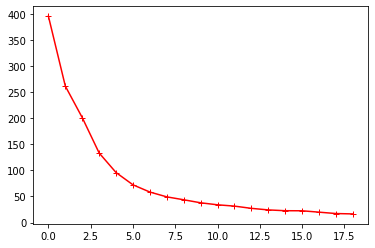

In [495]:
score = []
range_values = range(1,20)
for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(dados_scaled)
    score.append(kmeans.inertia_)
    
plt.plot(score, '+-r')

In [496]:
cluster = KMeans(n_clusters=3)
cluster.fit(dados_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [497]:
previsoes = cluster.labels_
centroides = cluster.cluster_centers_

In [498]:
previsoes

array([2, 0, 0, 2, 0, 2, 2, 2, 0, 2, 0, 1, 2, 2, 0, 0, 0, 2, 2, 0, 0, 1,
       2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0,
       0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 1, 2, 2],
      dtype=int32)

In [499]:
pca = PCA(n_components=2)
dados_pca = pca.fit_transform(dados_scaled)

In [500]:
dados_pca = pd.DataFrame(dados_pca, columns = ['PCA1', 'PCA2'])
dados_pca = pd.concat([dados_pca, pd.DataFrame({"grupo" : previsoes})], axis=1)

In [501]:
dados_pca2 = pd.concat([dados_pca, dados['country'], dados['Region']], axis=1)

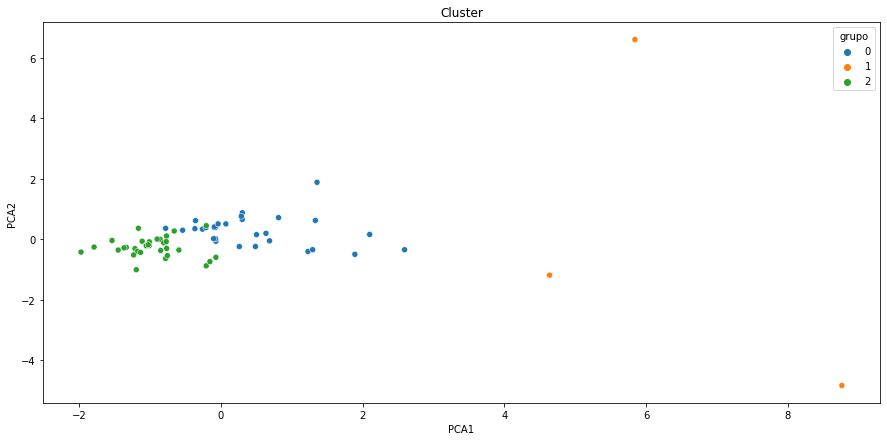

In [502]:
ax, fig = plt.subplots(figsize=(15,7))
sns.scatterplot(x = dados_pca2['PCA1'], y = dados_pca2['PCA2'], hue = dados_pca2['grupo'], palette  = 'tab10')
plt.title("Cluster")
plt.show()

In [503]:
dados_pca2[dados_pca2['grupo'] == 2]

,PCA1,PCA2,grupo,country,Region
0,-0.789853,-0.130209,2,Argentina,SouthAmerica
3,-0.847399,-0.368860,2,Belarus,EasternEurope
5,-1.787475,-0.256905,2,Bosnia and Herzegovina,SouthernEurope
6,-0.778727,-0.634854,2,Brazil,SouthAmerica
7,-1.009782,-0.208286,2,Bulgaria,EasternEurope
9,-0.773135,-0.082435,2,Chile,SouthAmerica
12,-1.210905,-0.307955,2,Colombia,SouthAmerica
13,-1.109458,-0.064774,2,Croatia,SouthernEurope
17,-1.333358,-0.265465,2,Egypt,NorthernAfrica
18,-0.856258,-0.000553,2,Estonia,NorthernEurope


In [504]:
dados_pca2[dados_pca2['grupo'] == 0]

,PCA1,PCA2,grupo,country,Region
1,0.071206,0.508049,0,Australia,Oceania
2,-0.079024,0.387050,0,Austria,WesternEurope
4,0.636819,0.197560,0,Belgium,WesternEurope
8,0.814639,0.715807,0,Canada,NorthernAmerica
10,2.592138,-0.344252,0,"China, Hong Kong SAR",EasternAsia
14,-0.778673,0.363327,0,Cyprus,WesternAsia
15,-0.069244,-0.065559,0,Czechia,EasternEurope
16,-0.258364,0.334632,0,Denmark,NorthernEurope
19,-0.356352,0.617470,0,Finland,NorthernEurope
20,1.333764,0.623672,0,France,WesternEurope


In [505]:
dados_pca2[dados_pca2['grupo'] == 1]

,PCA1,PCA2,grupo,country,Region
11,8.761021,-4.830521,1,China,EasternAsia
21,4.637244,-1.184140,1,Germany,WesternEurope
63,5.841262,6.598659,1,United States of America,NorthernAmerica
